In [ ]:
#BREAST CANCER DIAGNOSIS USING STATISTICAL NEURAL NETWORKS
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df_cleaned=df.drop(columns=['id','Unnamed: 32'])
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Encode the target variable
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
selected_features = [
    'area_mean',        # Lump Thickness
    'radius_se',        # Uniformity of Cell Size
    'smoothness_se',    # Uniformity of Cell Shape
    'compactness_mean', # Marginal Adhesion
    'radius_mean',      # Single Epithelial Cell Size
    'concave points_mean', # Bare Nuclei
    'texture_mean',     # Bland Chromatin
    'fractal_dimension_mean', # Normal Nucleoli
    'area_worst'        # Mitoses
]

X = df[selected_features]
y = df['diagnosis']
print(X.head())

   area_mean  radius_se  smoothness_se  compactness_mean  radius_mean  \
0     1001.0     1.0950       0.006399           0.27760        17.99   
1     1326.0     0.5435       0.005225           0.07864        20.57   
2     1203.0     0.7456       0.006150           0.15990        19.69   
3      386.1     0.4956       0.009110           0.28390        11.42   
4     1297.0     0.7572       0.011490           0.13280        20.29   

   concave points_mean  texture_mean  fractal_dimension_mean  area_worst  
0              0.14710         10.38                 0.07871      2019.0  
1              0.07017         17.77                 0.05667      1956.0  
2              0.12790         21.25                 0.05999      1709.0  
3              0.10520         20.38                 0.09744       567.7  
4              0.10430         14.34                 0.05883      1575.0  


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())

   area_mean  radius_se  smoothness_se  compactness_mean  radius_mean  \
0   0.984375   2.489734      -0.214002          3.283515     1.097064   
1   1.908708   0.499255      -0.605351         -0.487072     1.829821   
2   1.558884   1.228676      -0.297005          1.052926     1.579888   
3  -0.764464   0.326373       0.689702          3.402909    -0.768909   
4   1.826229   1.270543       1.483067          0.539340     1.750297   

   concave points_mean  texture_mean  fractal_dimension_mean  area_worst  
0             2.532475     -2.073335                2.255747    2.001237  
1             0.548144     -0.353632               -0.868652    1.890489  
2             2.037231      0.456187               -0.398008    1.456285  
3             1.451707      0.253732                4.910919   -0.550021  
4             1.428493     -1.151816               -0.562450    1.220724  


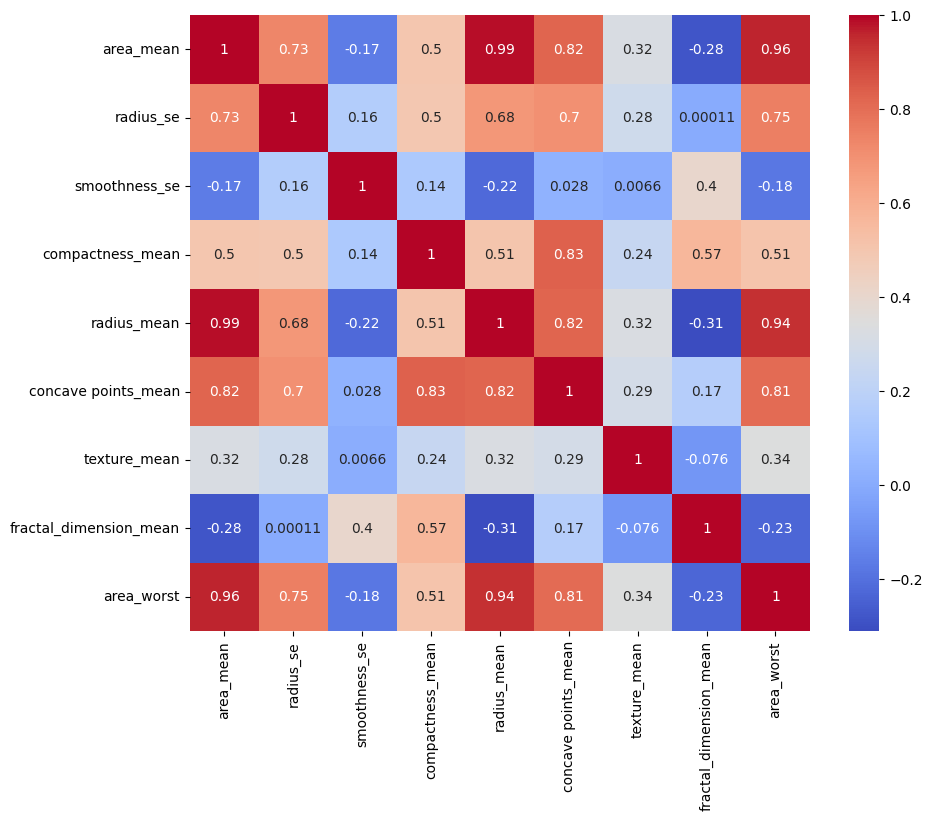

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(455, 9) (114, 9)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and train the RBF-based SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
rbf_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF Kernel SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf)*100)
print(classification_report(y_test, y_pred_rbf))


RBF Kernel SVM Performance:
Accuracy: 92.98245614035088
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Optimized GRNN Performance:
Best h: 0.1142
Accuracy: 96.00%
Mean Squared Error: 0.0401
R-squared Score: 0.8390


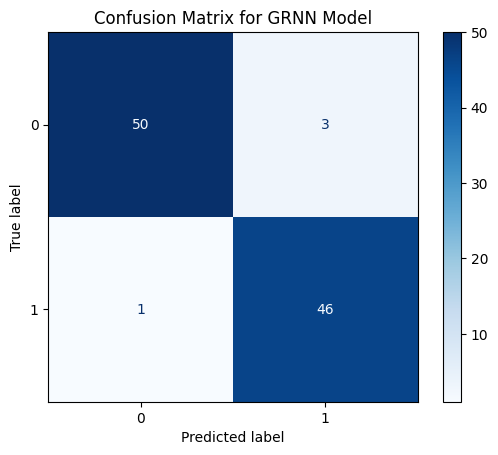

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

class GRNN:
    def __init__(self, h=0.1):  # Smoothing parameter (bandwidth)
        self.h = h
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        distances = cdist(X_test, self.X_train, metric='euclidean')
        weights = np.exp(-(distances**2) / (2 * self.h**2))
        weight_sums = np.sum(weights, axis=1, keepdims=True)
        weight_sums[weight_sums == 0] = 1  # Prevent division by zero
        y_pred = np.dot(weights, self.y_train) / weight_sums.ravel()
        return y_pred

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for 'h'
best_h = None
best_accuracy = 0

for h in np.linspace(0.01, 1.0, 20):  # Try 20 values of h
    grnn = GRNN(h=h)
    grnn.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_pred_grnn = grnn.predict(X_test_scaled)
    y_pred_classes = np.round(y_pred_grnn)  # Convert regression output to classification

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred_classes)

    if acc > best_accuracy:
        best_accuracy = acc
        best_h = h  # Store the best smoothing parameter

# Train GRNN with the best 'h'
grnn = GRNN(h=best_h)
grnn.fit(X_train_scaled, y_train)

# Final Prediction
y_pred_grnn = grnn.predict(X_test_scaled)
y_pred_classes = np.round(y_pred_grnn)  # Convert to class labels

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_classes) * 100
mse = mean_squared_error(y_test, y_pred_grnn)
r2 = r2_score(y_test, y_pred_grnn)

print("Optimized GRNN Performance:")
print(f"Best h: {best_h:.4f}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for GRNN Model")
plt.show()



Optimized PNN Accuracy: 94.74%
Best Sigma Value: 0.8477
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



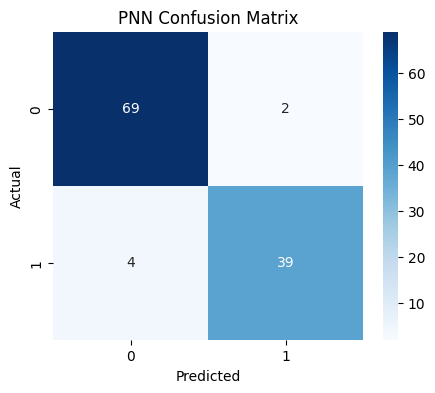

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Encode the target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the PNN class
class PNN:
    def __init__(self, sigma=0.1):
        self.sigma = sigma
        self.X_train = None
        self.y_train = None
        self.classes = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.classes = np.unique(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        num_samples = X_test.shape[0]
        predictions = []
        distances = cdist(X_test, self.X_train, metric='euclidean')

        for i in range(num_samples):
            probs = {}
            for cls in self.classes:
                class_mask = self.y_train == cls
                class_distances = distances[i, class_mask]
                weights = np.exp(- (class_distances**2) / (2 * self.sigma**2))
                probs[cls] = np.sum(weights)

            predictions.append(max(probs, key=probs.get))

        return np.array(predictions)

# Hyperparameter tuning for sigma
best_sigma = None
best_accuracy = 0

for sigma in np.linspace(0.01, 1.0, 40):
    pnn = PNN(sigma=sigma)
    pnn.fit(X_train_scaled, y_train)
    y_pred = pnn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_sigma = sigma

# Train final PNN with best sigma
pnn = PNN(sigma=best_sigma)
pnn.fit(X_train_scaled, y_train)
y_pred = pnn.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized PNN Accuracy: {accuracy * 100:.2f}%")
print(f"Best Sigma Value: {best_sigma:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("PNN Confusion Matrix")
plt.show()
